In [152]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(rc={'figure.figsize':(8 , 4)})

In [154]:
!pip install openpyxl

In [155]:
# Cargar los datos
file_path = 'data/data.csv'

# Intentar cargar el archivo detectando automáticamente el delimitador
data = pd.read_csv(file_path, encoding='latin1', delimiter=';')

# Verificar las primeras filas
data.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos anuales brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,NaN
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,ivila,"1,767",30,1,299,NaN


In [156]:
data = data.rename(columns={'ID':'id','Genero':'genero','Casado':'casado','Edad':'edad',
                            'Graduado':'graduado', 'Profesion':'profesion',
                            'Experiencia laboral':'exp_laboral', 'Gastoscore':'nivel_gasto',
                            'Family_Size':'tamanno_familia','anno_nacimiento':'anno_nacimiento',
                            'Generacion':'generacion', 'Ingresos anuales brutos':'ingresos_anuales',
                            'Provincia':'provincia','Digital_encuesta':'encuentro_digital',
                            'Gasto_medio_mensual_cuota':'gasto_medio_mensual_cuota', 'Abandono':'abandono',
                            'Dias_cliente':'dias_como_cliente', 'Campanna_anno':'camp_anno'})

In [157]:
columns = data.columns
columns

Index(['id', 'genero', 'casado', 'edad', 'graduado', 'profesion',
       'exp_laboral', 'nivel_gasto', 'tamanno_familia', 'anno_nacimiento',
       'generacion', 'ingresos_anuales', 'provincia', 'encuentro_digital',
       'gasto_medio_mensual_cuota', 'abandono', 'dias_como_cliente',
       'camp_anno'],
      dtype='object')

In [158]:
data.shape

(10806, 18)

In [159]:
describe = data.describe()
describe

,edad,tamanno_familia,anno_nacimiento,ingresos_anuales,gasto_medio_mensual_cuota,abandono,dias_como_cliente
count,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000,10806.000000
mean,47.920415,2.764390,1976.075236,56113.470387,45.285027,0.297983,298.006293
std,18.432100,1.548241,18.431804,35458.081118,28.674032,0.457393,148.844349
min,20.000000,1.000000,1926.000000,12003.000000,30.000000,0.000000,30.000000
25%,33.000000,2.000000,1966.000000,24986.250000,30.000000,0.000000,177.000000
50%,45.000000,2.000000,1979.000000,43628.000000,30.000000,0.000000,289.000000
75%,58.000000,4.000000,1991.000000,86678.500000,50.000000,1.000000,401.000000
max,98.000000,9.000000,2004.000000,129963.000000,200.000000,1.000000,600.000000


In [160]:
describe['abandono']

count    10806.000000
mean         0.297983
std          0.457393
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: abandono, dtype: float64

In [161]:
data.isna().sum(axis=0)

id                              0
genero                          0
casado                        190
edad                            0
graduado                      103
profesion                       0
exp_laboral                     0
nivel_gasto                     0
tamanno_familia                 0
anno_nacimiento                 0
generacion                      0
ingresos_anuales                0
provincia                       0
encuentro_digital               0
gasto_medio_mensual_cuota       0
abandono                        0
dias_como_cliente               0
camp_anno                    5707
dtype: int64

In [162]:
abandonos_campanna = data[data['camp_anno'].isnull()].abandono.sum()
abandonos_campanna

2166

In [163]:
abandonos_totales = data['abandono'].sum()
abandonos_totales

3220

In [164]:
porcentaje_abandonos = abandonos_campanna / abandonos_totales

In [165]:
print(f'Porcentaje de abandono por desconocimiento de campaña {round(porcentaje_abandonos*100,2)}%')

Porcentaje de abandono por desconocimiento de campaña 67.27%


In [166]:
data['camp_anno'].fillna(value='0',inplace=True)
data['camp_anno'].unique()

C:\Users\mglez\AppData\Local\Temp\ipykernel_8220\2958348007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['camp_anno'].fillna(value='0',inplace=True)


array(['0', '3', '1', '0,5', '4'], dtype=object)

In [167]:
data.head()

,id,genero,casado,edad,graduado,profesion,exp_laboral,nivel_gasto,tamanno_familia,anno_nacimiento,generacion,ingresos_anuales,provincia,encuentro_digital,gasto_medio_mensual_cuota,abandono,dias_como_cliente,camp_anno
0,CLI2,M,No,24,No,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,0
1,CLI3,F,Si,42,Si,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,Si,74,Si,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,Si,74,Si,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,Si,44,Si,Otros,+20annos,Alto,6,1980,Generacion X,90776,ivila,"1,767",30,1,299,0


In [168]:
casado_moda = data['casado'].mode()[0]  # .mode() devuelve una serie, seleccionamos el primer valor
casado_moda

'Si'

In [169]:
# Sustituir valores faltantes en la columna 'casado' con su moda
data['casado'].fillna(value=casado_moda, inplace=True)

C:\Users\mglez\AppData\Local\Temp\ipykernel_8220\1500024664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['casado'].fillna(value=casado_moda, inplace=True)


In [170]:
graduado_moda = data['graduado'].mode()[0]
graduado_moda

'Si'

In [171]:
# Sustituir valores faltantes en la columna 'graduado' con su moda
data['graduado'].fillna(value=graduado_moda, inplace=True)

C:\Users\mglez\AppData\Local\Temp\ipykernel_8220\2035986539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['graduado'].fillna(value=graduado_moda, inplace=True)


In [172]:
# Lista de columnas binarias identificadas por ti
columnas_binarias = ['casado', 'graduado']  # Modifica según sea necesario

# Sustituir 'Si' por 1 y 'No' por 0 en las columnas binarias
data[columnas_binarias] = data[columnas_binarias].replace({'Si': 1, 'No': 0})

C:\Users\mglez\AppData\Local\Temp\ipykernel_8220\3242837472.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columnas_binarias] = data[columnas_binarias].replace({'Si': 1, 'No': 0})


In [173]:
data.head()

,id,genero,casado,edad,graduado,profesion,exp_laboral,nivel_gasto,tamanno_familia,anno_nacimiento,generacion,ingresos_anuales,provincia,encuentro_digital,gasto_medio_mensual_cuota,abandono,dias_como_cliente,camp_anno
0,CLI2,M,0,24,0,Funcionario,<10annos,Bajo,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,0
1,CLI3,F,1,42,1,Ingeniero,+20annos,Medio,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,F,1,74,1,Ingeniero,+20annos,Bajo,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,M,1,74,1,Servicios,+20annos,Alto,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,F,1,44,1,Otros,+20annos,Alto,6,1980,Generacion X,90776,ivila,"1,767",30,1,299,0


In [174]:
for column in data.columns:
    print(f'{column} \n {data[column].unique()}\n')

id 
 ['CLI2' 'CLI3' 'CLI4' ... 'CLI10805' 'CLI10806' 'CLI10807']

genero 
 ['M' 'F']

casado 
 [0 1]

edad 
 [24 42 74 44 62 35 36 67 61 29 21 77 64 45 34 87 54 20 40 39 50 46 91 30
 31 52 32 63 84 28 79 53 81 65 43 56 33 69 57 66 75 95 55 47 88 41 51 76
 86 78 90 25 22 94 23 58 68 83 72 98 73 80 85 96 92 89 97 37 38]

graduado 
 [0 1]

profesion 
 ['Funcionario' 'Ingeniero' 'Servicios' 'Otros' 'Artista' 'Ejecutivo'
 'Medico' 'Construccion' 'Negocios/empresa']

exp_laboral 
 ['<10annos' '+20annos' '10-20annos']

nivel_gasto 
 ['Bajo' 'Medio' 'Alto']

tamanno_familia 
 [4 3 1 2 6 5 8 7 9]

anno_nacimiento 
 [2000 1982 1950 1980 1962 1989 1988 1957 1963 1995 2003 1947 1960 1979
 1990 1937 1970 2004 1984 1985 1974 1978 1933 1994 1993 1972 1992 1961
 1940 1996 1945 1971 1943 1959 1981 1968 1991 1955 1967 1958 1949 1929
 1969 1977 1936 1983 1973 1948 1938 1946 1934 1999 2002 1930 2001 1966
 1956 1941 1952 1926 1951 1944 1939 1928 1932 1935 1927]

generacion 
 ['Generacion Z' 'Millennials' '

In [175]:
# Diccionarios de jerarquías para cada columna
jerarquias = {
    'exp_laboral': {'<10annos': 0, '10-20annos': 1, '+20annos': 2},
    'nivel_gasto': {'Bajo': 0, 'Medio': 1, 'Alto': 2},
    'genero':{'F':0,'M':1}
}

# Aplicar la jerarquía a cada columna
for columna, mapa in jerarquias.items():
    data[columna] = data[columna].replace(mapa)

# Verificar las columnas transformadas
data.head()


C:\Users\mglez\AppData\Local\Temp\ipykernel_8220\3905262769.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columna] = data[columna].replace(mapa)


,id,genero,casado,edad,graduado,profesion,exp_laboral,nivel_gasto,tamanno_familia,anno_nacimiento,generacion,ingresos_anuales,provincia,encuentro_digital,gasto_medio_mensual_cuota,abandono,dias_como_cliente,camp_anno
0,CLI2,1,0,24,0,Funcionario,0,0,4,2000,Generacion Z,13945,Malaga,"1,029",30,0,278,0
1,CLI3,0,1,42,1,Ingeniero,2,1,3,1982,Millennials,118107,Salamanca,"1,79",30,0,455,3
2,CLI4,0,1,74,1,Ingeniero,2,0,1,1950,Generacion X,53533,Burgos,"1,326",50,0,380,1
3,CLI5,1,1,74,1,Servicios,2,2,2,1950,Generacion X,82273,Gerona,"0,779",50,1,387,3
4,CLI6,0,1,44,1,Otros,2,2,6,1980,Generacion X,90776,ivila,"1,767",30,1,299,0


In [186]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas a las que deseas aplicar LabelEncoder
columnas_a_codificar = ['id','profesion', 'generacion', 'provincia']  # Cambia los nombres según tu DataFrame

In [187]:
# Crear un diccionario para almacenar los codificadores (opcional, si necesitas revertir el encoding)
label_encoders = {}

# Iterar sobre las columnas seleccionadas
for columna in columnas_a_codificar:
    le = LabelEncoder()  # Crear un nuevo codificador para cada columna
    data[columna] = le.fit_transform(data[columna])  # Aplicar el codificador
    label_encoders[columna] = le  # Guardar el codificador si necesitas revertir o inspeccionar


In [203]:
# Filtrar las filas donde 'abandono' es 1 (indica abandono)
data[data['abandono'] == 1][['dias_como_cliente','casado','edad','graduado','nivel_gasto','tamanno_familia','gasto_medio_mensual_cuota','camp_anno']].mean()


dias_como_cliente            250.289130
casado                         0.606832
edad                          48.441925
graduado                       0.616149
nivel_gasto                    0.568944
tamanno_familia                2.754348
gasto_medio_mensual_cuota     45.260870
camp_anno                      0.437733
dtype: float64

In [188]:
data.head()

,id,genero,casado,edad,graduado,profesion,exp_laboral,nivel_gasto,tamanno_familia,anno_nacimiento,generacion,ingresos_anuales,provincia,encuentro_digital,gasto_medio_mensual_cuota,abandono,dias_como_cliente,camp_anno
0,1918,1,0,24,0,3,0,0,4,2000,2,13945,28,1.029,30,0,278,0.0
1,3029,0,1,42,1,4,2,1,3,1982,3,118107,35,1.790,30,0,455,3.0
2,4140,0,1,74,1,4,2,0,1,1950,1,53533,6,1.326,50,0,380,1.0
3,5251,1,1,74,1,8,2,2,2,1950,1,82273,14,0.779,50,1,387,3.0
4,6362,0,1,44,1,7,2,2,6,1980,1,90776,49,1.767,30,1,299,0.0


In [189]:
# Reemplazar ',' por '.' en la columna y convertir a tipo numérico
data['encuentro_digital'] = data['encuentro_digital'].str.replace(',', '.').astype(float)

# Verificar los cambios
data['encuentro_digital'].head()


AttributeError: Can only use .str accessor with string values!

In [ ]:
# Reemplazar ',' por '.' en la columna y convertir a tipo numérico
data['camp_anno'] = data['camp_anno'].str.replace(',', '.').astype(float)

# Verificar los cambios
data['camp_anno'].head()


0    0.0
1    3.0
2    1.0
3    3.0
4    0.0
Name: camp_anno, dtype: float64

In [ ]:
data.to_csv('datos_sin_normalizar.csv')

In [190]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

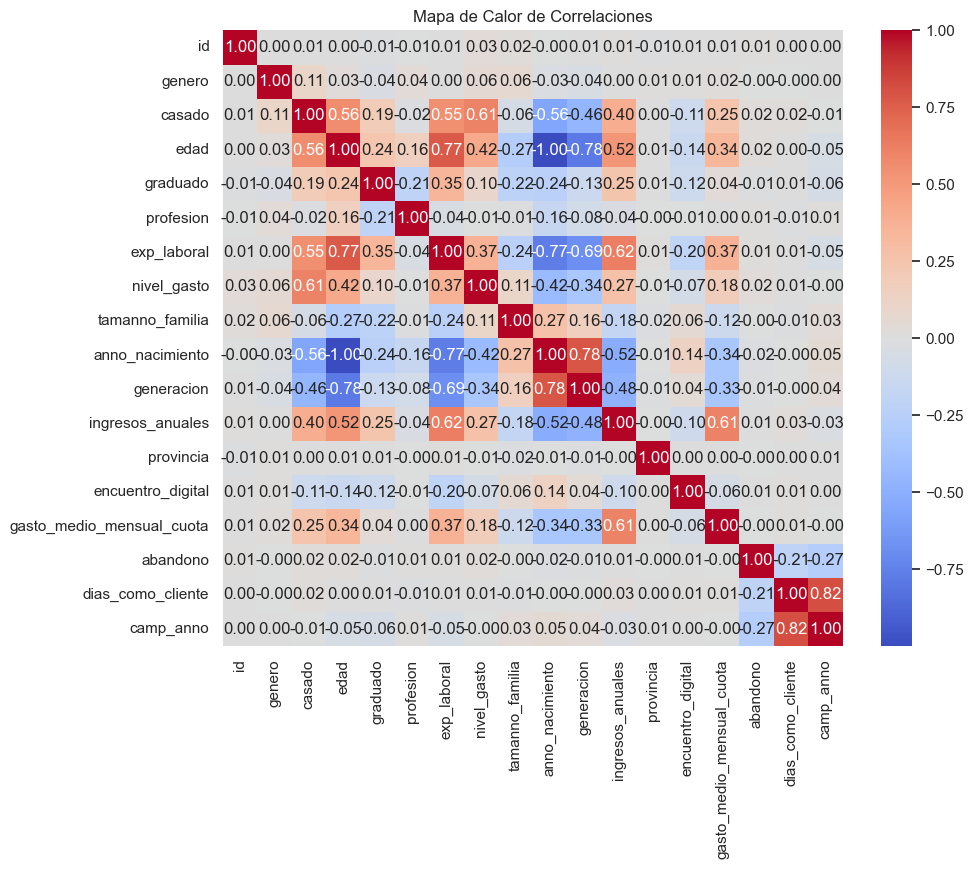

In [191]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [192]:
# Umbral para correlaciones altas
threshold = 0.5

# Filtrar las correlaciones altas (excluyendo la diagonal principal)
high_correlation = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]
np.fill_diagonal(high_correlation.values, 0)  # Ignorar la diagonal principal


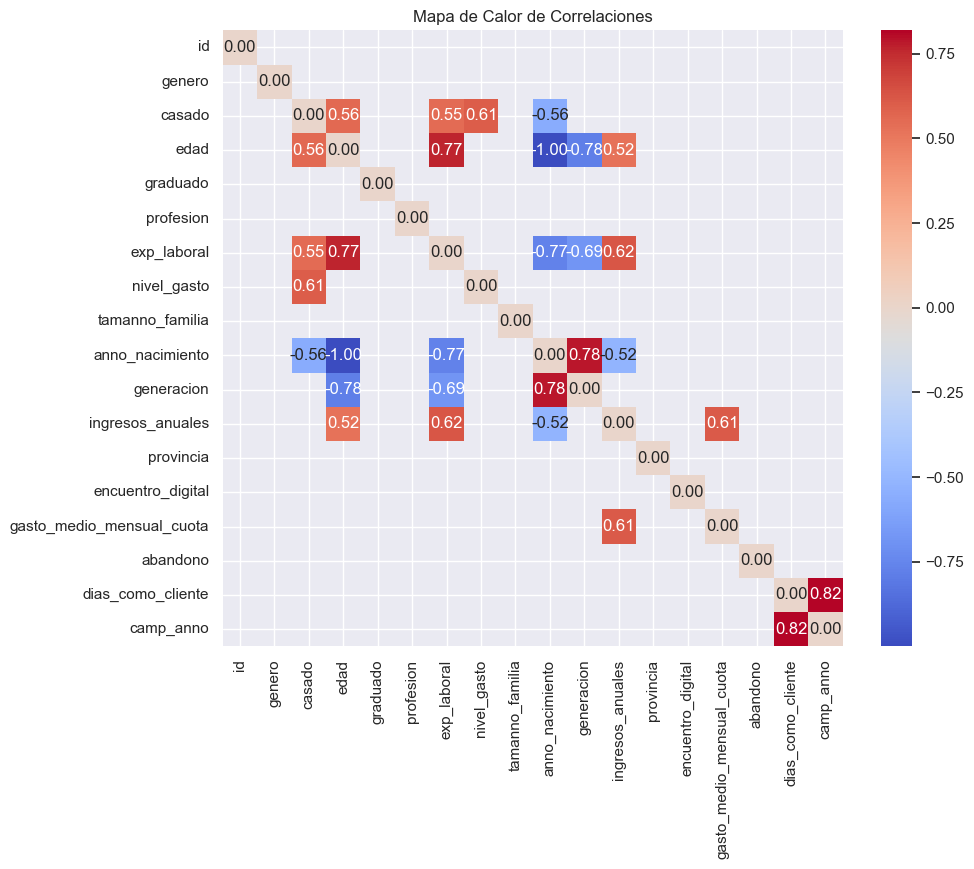

In [193]:
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

In [194]:
columnas = ['id',
            'casado',
            'edad',
            'exp_laboral',
            'nivel_gasto',
            'anno_nacimiento',
            'generacion',
            'ingresos_anuales',
            'gasto_medio_mensual_cuota',
            'abandono',
            'dias_como_cliente',
            'camp_anno']

In [151]:
data_final = data[columnas]